In [4]:
import numpy as np

define functions
convex = quadratic  objective with linear constraints

In [53]:
# Convex Optimization Problem
def f(x):
    return 1/2*(x[0]**2 + x[1]**2)


# Non convex Optimization Problem
def g(x):
    return 1/2*(-x[0]**2 + x[1]**2)



method of multipliers algorithm

In [54]:

def method_of_multipliers_convex(c0, v0, x0, beta, max_iter=100, tol=1e-6):
    # Initialize variables
    c = c0
    v = v0
    x1 = x0[0]
    x2 = x0[1]

    # Store the values of x1, v, c for later analysis
    x_values = [x1]
    v_values = [v]
    c_values = [c]
    
    for k in range(max_iter):
        # Update x1
        x1_new = (c - v) / (1 + c)
        
        # x2 is always 0
        x2_new = 0
        
        # Update v 
        v_new = v + c * (x1_new - 1)
        
        # Update c 
        c_new = beta * c
        
        # convergence
        if np.abs(x1_new - x1) < tol and np.abs(v_new - v) < tol and np.abs(c_new - c) < tol:
            break
        
        # Update for the next iteration
        x1, x2, v, c = x1_new, x2_new, v_new, c_new
        
        x_values.append(x1)
        v_values.append(v)
        c_values.append(c)
    
    
    return x1, v, c, x_values, v_values, c_values




In [55]:

def method_of_multipliers_nonconvex(c0, v0, x0, beta, max_iter=100, tol=1e-6):
    # Initialize variables
    c = c0
    v = v0
    x1 = x0[0]
    x2 = x0[1]

    # Store the values of x1, v, c for later analysis
    x_values = [x1]
    v_values = [v]
    c_values = [c]
    
    for k in range(max_iter):
        # Update x1
        x1_new = (c - v) / (c-1)
        
        # x2 is always 0
        x2_new = 0
        
        # Update v 
        v_new = v + c * (x1_new - 1)
        
        # Update c 
        c_new = beta * c
        
        # convergence
        if np.abs(x1_new - x1) < tol and np.abs(v_new - v) < tol and np.abs(c_new - c) < tol:
            break
        
        # Update for the next iteration
        x1, x2, v, c = x1_new, x2_new, v_new, c_new
        
        x_values.append(x1)
        v_values.append(v)
        c_values.append(c)
    
    
    return x1, v, c, x_values, v_values, c_values




In [66]:
# Parameters
x0 = np.array([-1, -1])
v0 = 2.5
c0 = 0.5
beta1 = 1.1 #part a 
beta2 = 1.0 ##part b
max_iter = 100

Results and observations


convex converged at 1.0  with c = 6890.3061699111895 whereas non convex converged at 1.0  with c = 2.5768876036600566e+47


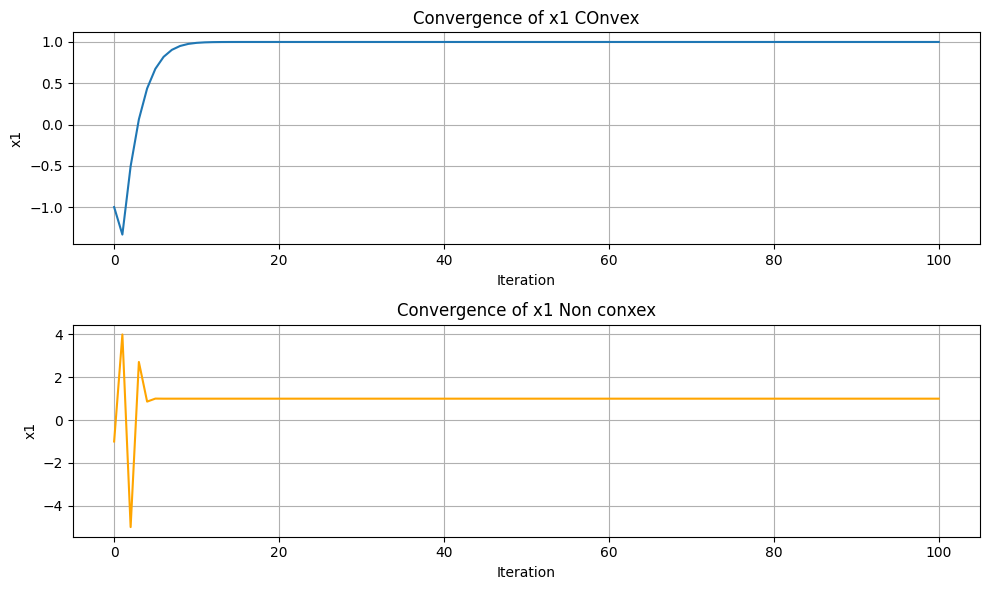

In [70]:
##for convex
x1_final_convex, v_final_convex, c_final_convex, x_values_convex, v_values, c_values_C = method_of_multipliers_convex(c0, v0, x0, beta1, max_iter)

##for non convex
x1_final_nonconvex, v_final_nonconvex, c_final_nonconvex, x_values_nonconvex, v_values, c_values_nc = method_of_multipliers_nonconvex(c0, v0, x0, 3, max_iter)

print(f"convex converged at {x1_final_convex}  with c = {c_final_convex} whereas non convex converged at {x1_final_nonconvex}  with c = {c_final_nonconvex}")
#Plots
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(x_values_convex, label='x1')
plt.title('Convergence of x1 COnvex')
plt.xlabel('Iteration')
plt.ylabel('x1')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(x_values_nonconvex, label='x1', color='orange')
plt.title('Convergence of x1 Non conxex')
plt.xlabel('Iteration')
plt.ylabel('x1')
plt.grid(True)

plt.tight_layout()
plt.show()
